# 4.2 심파이를 사용한 함수 미분

### 예측모형의 성능

성능함수

**손실함수(=비용함수=오차함수=목적함수**)

**최적화, 미분**

### 기울기

### 연습문제 4.2.1

2.5/-0.5/-1/0.25/2

### 수치미분

scipy.derivative()

수치적으로 대략적인 기울기 계산

인수: 1)함수f  2)x위치 x  3)이동거리 dx

*dx는 작을 수록 좋지만 너무 작을 경우 오버플로우 오류로 오차 증폭 가능성 있음

기울기 =( f(x+1/2dx)-f(x-1/2dx) ) / dx

In [3]:
from scipy.misc import derivative

def f(x):
    return x**3 - 3 * x**2 + x
print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-6))

1.000000000001
-2.000000000002


### 미분

**어떤함수로부터 그 함수 기울기를 출력하는 새로운 함수(도함수)를 만들어내는 작업**

### 연습문제 4.2.2

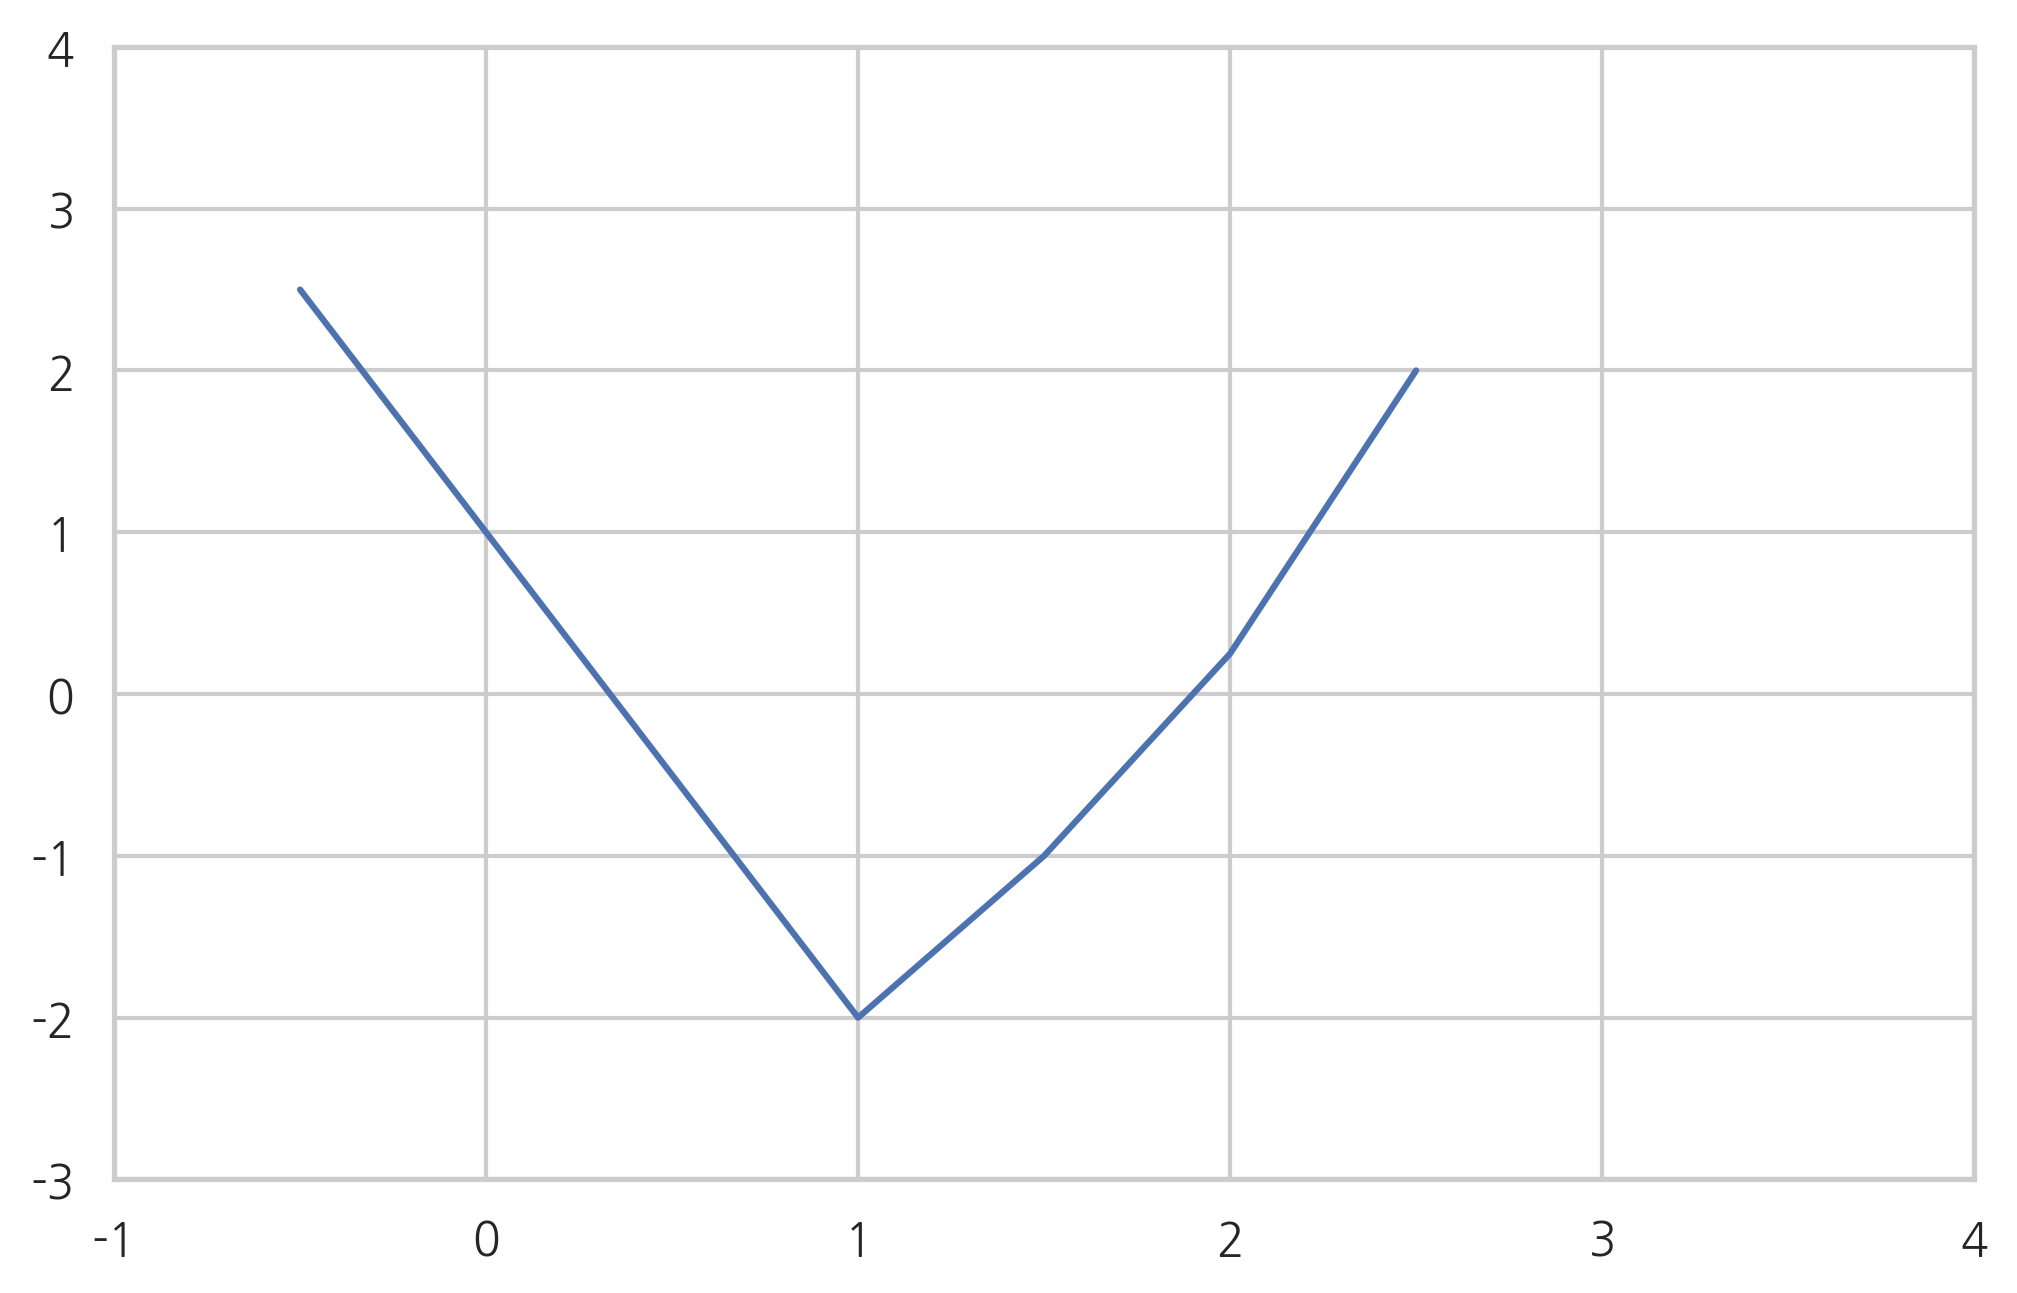

In [5]:
x = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5]
y = [2.5, 1, -0.5, -2, -1, 0.25, 2]

xx = np.linspace(-1,4, 400)
plt.plot(x,y)
plt.xlim(-1,4)
plt.ylim(-3,4)
plt.show()

### 미분 가능

기울기 정의 불가능

ex)ReLU함수

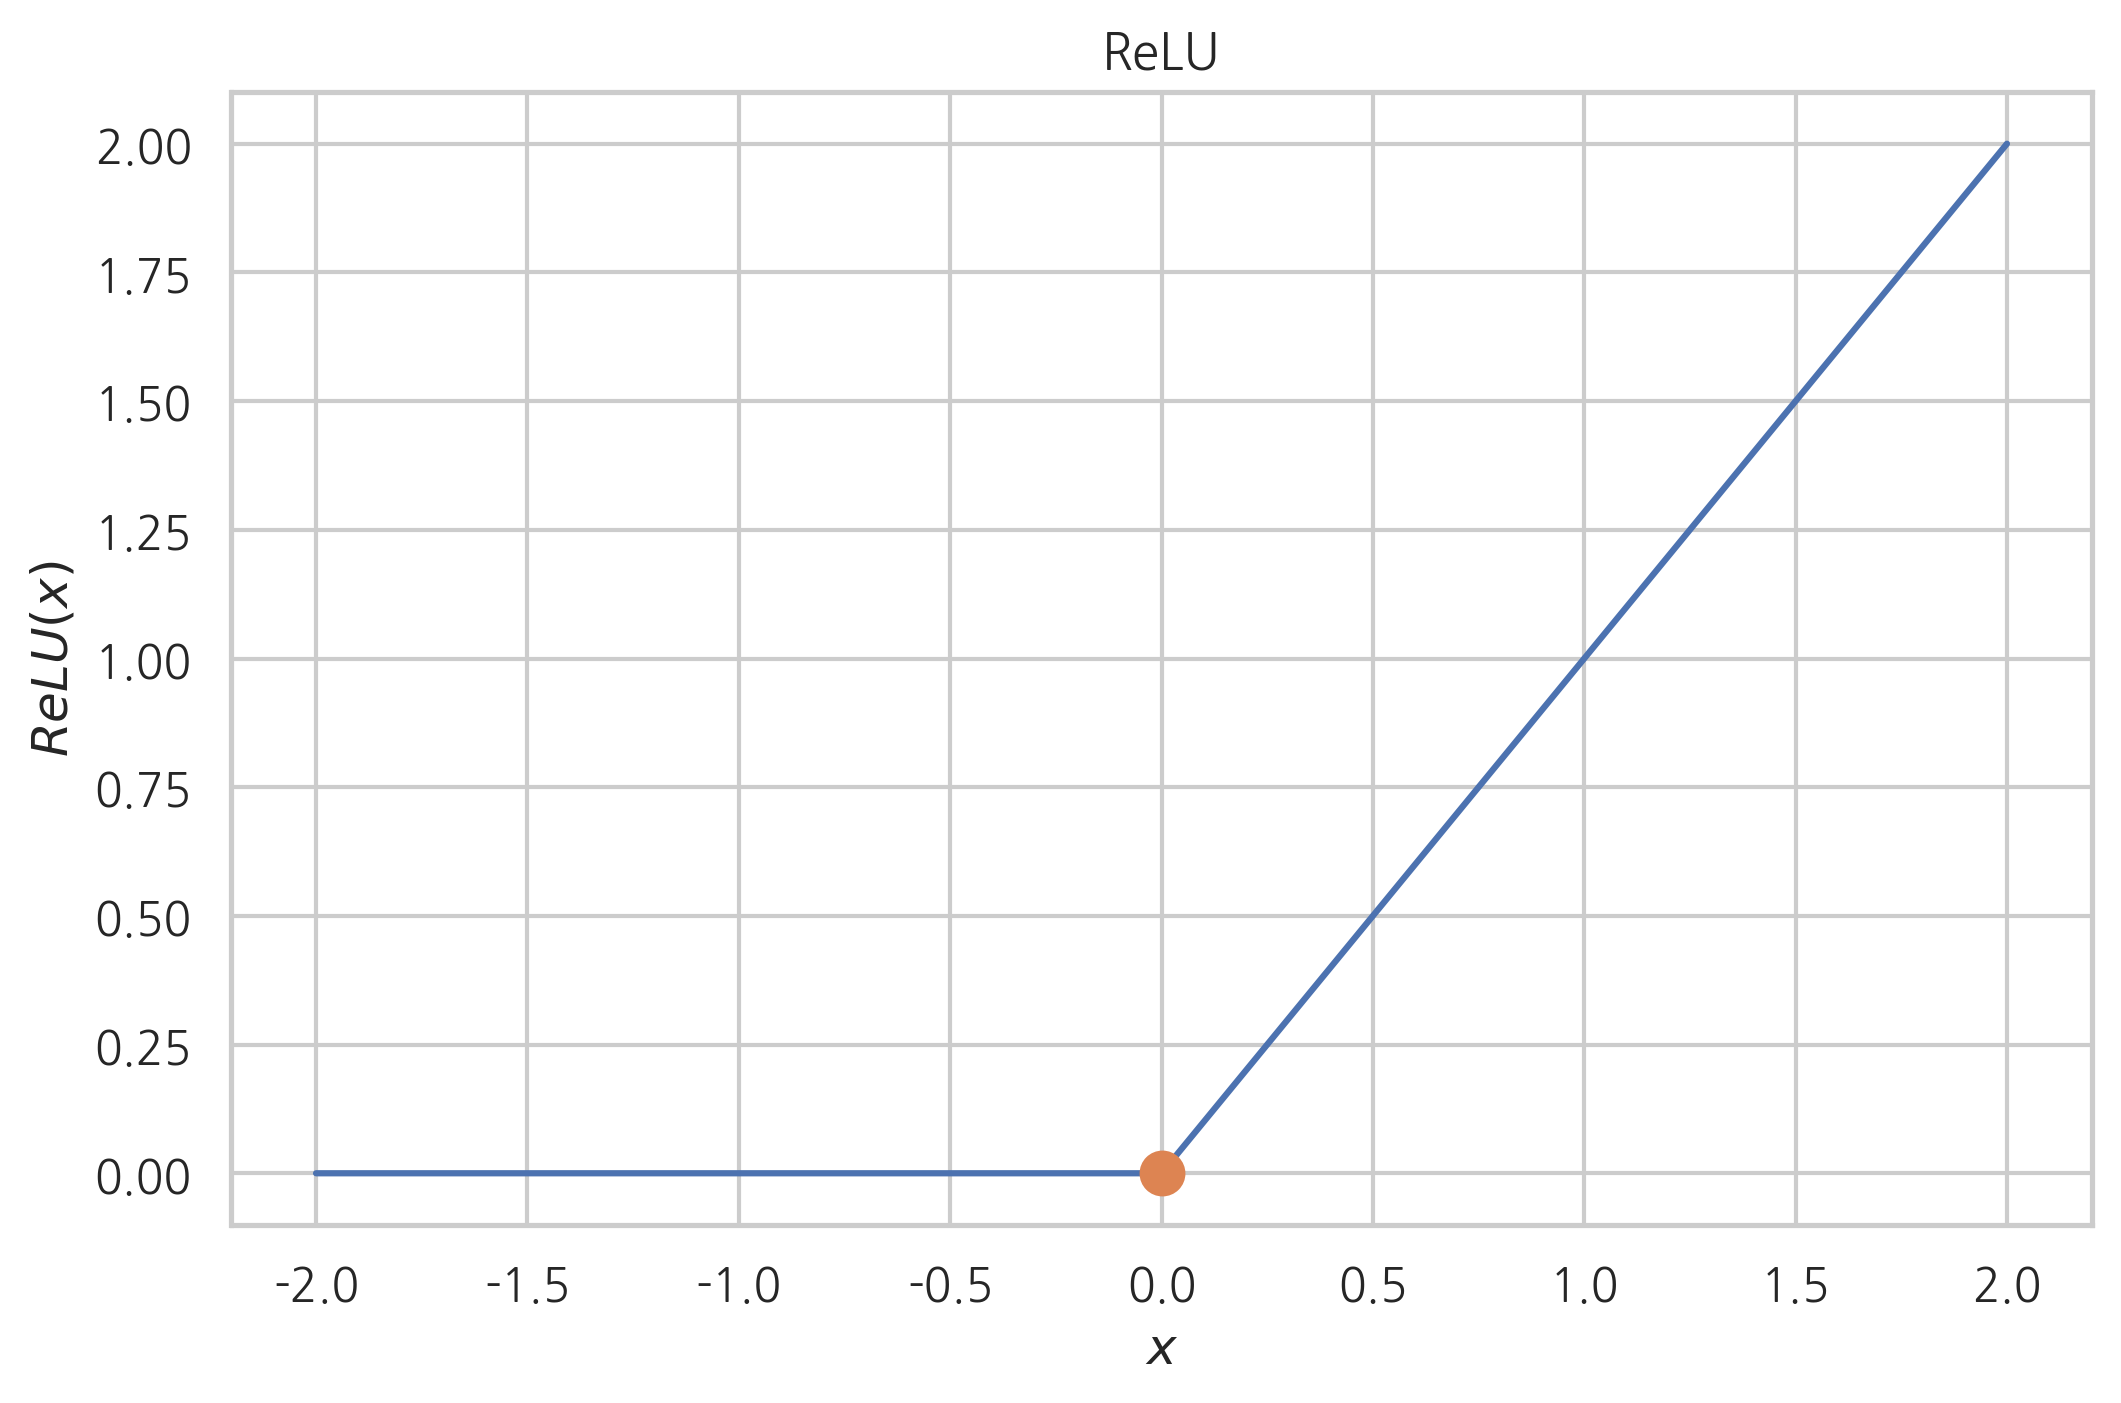

In [8]:
def relu(x):
    return np.where(x > 0, x, 0)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker = 'o', ms=10)
plt.title('ReLU')
plt.xlabel('$x$')
plt.ylabel('$ReLU(x)$')
plt.show()

### 미분 공식

#### 1) 기분미분공식

* 상수미분: 0
* 거듭제곱미분: (x^n)' = nx^(x-1)
* 로그함수 미분: (log x)' = 1 / x
* 지수함수 미분: (e^x)' = e^x

#### 2) 선형조합법칙

* 어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.
* 어떤 두 함수를 더한 함수를 미분한 결과는 원래 함수의 도함수를 더한 것과 같다.

#### 3) 곱셈법칙 

* 어떤 함수의 형태가 두 함수를 곱한 값과 같을 때는 다음과 같이 각 개별 함수의 도함수를 사용하여 원래 함수의 도함수를 구한다.

#### 4) 연쇄법칙

미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우,

f(x) = h(g(x))

df / dx = dh / dg * dg / dx

### 연습문제 4.2.3

1) 3x^2 

2) 2x / (x^2 - 3k)

3) e^(ax^b) * abx^b-1

#### 2차 도함수

도함수를 한 번 더 미분하여 만들어진 함수

* **2차 도함수값(볼록도)이 양수인 경우 볼록하다고 함**
* 2차 도함수값이 양수인 경우 오목하다고 함

*아래에서 바라본 관점

### 편미분

다변수 함수를 하나의 변수에 대해서만 미분한 것(다른 변수 상수 취급)

∂(라운드)기호 사용

fx(x,y) = ∂f / ∂x
fy(x,y) = ∂f / ∂y

### 다변수함수의 연쇄법칙

일변수함수와 마찬가지로 적용

### 2차 편미분

편미분의 2차 도함수를 구할 때는 각각의 미분에 쓰이는 독립변수를 자유롭게 선택 가능

fxx(x,y) = ∂^2f / ∂x^2

fyy(x,y) = ∂^2f / ∂y^2

fxy(x,y) = ∂^2f / ∂x∂y

fyx(x,y) = ∂^2f / ∂y∂x

이 때 fxy(x,y) = fyx(x,y)를 **슈와르츠 정리**라고 함

### 연습문제 4.2.4

1) exp(x^2 + 2y^2) * 2x

2)exp(x^2 + 2y^2) * 4y

3) (exp(x^2 + 2y^2) *) 2 + ( 2x* exp(x^2 + 2y^2) * 2x )

4)exp(x^2 + 2y^2) * 4y * 2x

5)exp(x^2 + 2y^2) * 4y * 2x

6)( exp(x^2 + 2y^2) * 4y * 4y ) + ( exp(x^2 + 2y^2) * 4 )

### 테일러 전개

함수의 기울기를 이용해 함수를 근사화

x0는 함숫값과 기울기를 구하는 x위치 (원하는 대로 설정)

f(x) ~ f(x0) +(  ( df(x0) / dx ) * (x-x0) )

f(x,y) ~ f(x0,y0) + ∂f(x0,y0) / ∂x * (x - x0) + ∂f(x0,y0) / ∂y (y - y0)

### 심파이

심볼릭연산을 지원하는 파이썬 패키지

심볼릭 연산: 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산

In [17]:
import sympy

# Jupyter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex = 'mathjax')

심볼릭변수: 아무런 숫자도 대입 되어 있지 않음

symbols() 명령을 통해 변수를 Symbol 클래스 자료형으로 바꿈

In [19]:
x = sympy.symbols('x')
x

x

In [20]:
type(x)

sympy.core.symbol.Symbol

In [21]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

* 수학 함수는 심파이 전용 함수 사용해야 함

diff() 함수로 미분 사용

simplify() 함수로 소인수 분해 등 수식 정리

In [22]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [23]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

편미분의 경우 미분하는 변수를  diff()에 명시

symbols() 명령으로 변수 여러 개 동시 선언 가능

In [25]:
x, y = sympy.symbols('x y')
f = x **2 + 4* x * y + 4 * y **2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [27]:
sympy.diff(f,x)

2⋅x + 4⋅y

In [28]:
sympy.diff(f,y)

4⋅x + 8⋅y

상수 심볼을 포함하는 함수를 미분하는 경우, 심파이는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없음

따라서, 편미분인 것처럼 입력 변수를 지정해야 함

In [29]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [30]:
sympy.diff(f,x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [31]:
sympy.simplify(sympy.diff(f,x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

이차 도함수는 다음처럼 구함

In [33]:
sympy.diff(f,x,x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

### 연습문제 4.2.5

In [37]:
#1
x = sympy.symbols('x')
f = x**3 - 1
sympy.simplify(sympy.diff(f))

   2
3⋅x 

In [41]:
#2
x, k = sympy.symbols('x k')
f = sympy.log(x**2 - 3 * k)
sympy.simplify(sympy.diff(f,x))

   2⋅x   
─────────
        2
-3⋅k + x 

In [43]:
#3
a, b, x = sympy.symbols('a b x')
f = sympy.exp(a* x**b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

### 연습문제 4.2.6

In [46]:
x, y = sympy.symbols('x y')
f = sympy.exp(x**2 + 2*y**2)
sympy.simplify(sympy.diff(f, x)), sympy.simplify(sympy.diff(f, y)), sympy.simplify(sympy.diff(f, x, x)), sympy.simplify(sympy.diff(f, x, y)),sympy.simplify(sympy.diff(f, y, x)), sympy.simplify(sympy.diff(f, y, y))

⎛      2      2        2      2               2      2          2      2      
⎜     x  + 2⋅y        x  + 2⋅y   ⎛   2    ⎞  x  + 2⋅y          x  + 2⋅y       
⎝2⋅x⋅ℯ         , 4⋅y⋅ℯ         , ⎝4⋅x  + 2⎠⋅ℯ         , 8⋅x⋅y⋅ℯ         , 8⋅x⋅

    2      2                2      2⎞
   x  + 2⋅y   ⎛    2    ⎞  x  + 2⋅y ⎟
y⋅ℯ         , ⎝16⋅y  + 4⎠⋅ℯ         ⎠